In [ ]:


# --------------------------------------------------------------
# Simple Linear Regression
# Predict the marks obtained by a student based on hours of study
# --------------------------------------------------------------


# Import Pandas for data processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files  # data on boarding
dataset = files.upload()

Saving 01Students.csv to 01Students.csv


In [ ]:
dataset

{'01Students.csv': b'Hours,Marks\r\n0,34\r\n1,36\r\n1,33\r\n1,39\r\n1,42\r\n2,45\r\n2,38\r\n3,45\r\n3,53\r\n3,46\r\n3,56\r\n4,59\r\n4,55\r\n4,56\r\n5,72\r\n5,59\r\n6,62\r\n6,71\r\n7,78\r\n7,88\r\n7,61\r\n7,74\r\n8,71\r\n8,89\r\n9,82\r\n9,67\r\n9,89\r\n10,81\r\n10,82\r\n11,79\r\n'}

In [ ]:
# data pre processing

In [ ]:
# raw data into data frame transformation
data = pd.read_csv('01Students.csv')

In [ ]:
data

,Hours,Marks
0,0,34
1,1,36
2,1,33
3,1,39
4,1,42
5,2,45
6,2,38
7,3,45
8,3,53
9,3,46


In [ ]:
# shallow copy of the data

data_copy = data.copy()

In [ ]:
data_copy

,Hours,Marks
0,0,34
1,1,36
2,1,33
3,1,39
4,1,42
5,2,45
6,2,38
7,3,45
8,3,53
9,3,46


In [ ]:
data


,Hours,Marks
0,0,34
1,1,36
2,1,33
3,1,39
4,1,42
5,2,45
6,2,38
7,3,45
8,3,53
9,3,46


on the prediction of marks in the student dataset , i decide x variable is hours ,  and the target is marks , so i decided to train the machine learning model in the **supervised** way.

  as the target value (y value ) is seems like a continous number so i decided to give the pbm stsmt to regression analysis.

DATA PREPROCESSING :
EDA

**EDA** Exploartory Data Analysis ( Descriptive Statistics)

In [ ]:
data.shape

(30, 2)

In [ ]:
data.head(18) #

,Hours,Marks
0,0,34
1,1,36
2,1,33
3,1,39
4,1,42
5,2,45
6,2,38
7,3,45
8,3,53
9,3,46


In [ ]:
data.tail()

,Hours,Marks
25,9,67
26,9,89
27,10,81
28,10,82
29,11,79


In [ ]:
data.iloc[5:15] # data slicing

,Hours,Marks
5,2,45
6,2,38
7,3,45
8,3,53
9,3,46
10,3,56
11,4,59
12,4,55
13,4,56
14,5,72


In [ ]:
data.iloc[6:10]

,Hours,Marks
6,2,38
7,3,45
8,3,53
9,3,46


In [ ]:
data.info() # technical enquiry

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Hours   30 non-null     int64
 1   Marks   30 non-null     int64
dtypes: int64(2)
memory usage: 608.0 bytes


In [ ]:
data.describe() # early statistical report

,Hours,Marks
count,30.000000,30.000000
mean,5.200000,61.400000
std,3.188341,17.734828
min,0.000000,33.000000
25%,3.000000,45.250000
50%,5.000000,60.000000
75%,7.750000,77.000000
max,11.000000,89.000000


In [ ]:
# data cleaning

data.isnull().sum()# 3 no missing values in the dataframe so no need of data cleaning   nill ----  null --- nan

Hours    0
Marks    0
dtype: int64

In [ ]:
# Split into X (Independent) and Y (predicted)
X = data.iloc[:, :-1] # x = data['hours'] [0:31,1:1]
Y = data.iloc[:,  -1]

In [ ]:
X

,Hours
0,0
1,1
2,1
3,1
4,1
5,2
6,2
7,3
8,3
9,3


In [ ]:
Y

0     34
1     36
2     33
3     39
4     42
5     45
6     38
7     45
8     53
9     46
10    56
11    59
12    55
13    56
14    72
15    59
16    62
17    71
18    78
19    88
20    61
21    74
22    71
23    89
24    82
25    67
26    89
27    81
28    82
29    79
Name: Marks, dtype: int64

train- test spilit :

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (X, Y, test_size = 0.3, random_state = 7)  # 80:20 , 70:30, # parado principle

In [ ]:
x_train

,Hours
29,11
12,4
13,4
16,6
0,0
28,10
6,2
26,9
20,7
10,3


In [ ]:
y_train

0     34
4     42
16    62
5     45
13    56
11    59
22    71
1     36
2     33
25    67
3     39
21    74
26    89
18    78
29    79
20    61
7     45
10    56
14    72
19    88
6     38
Name: Marks, dtype: int64

MODEL BUILDING : supervised single linear regression model
                because we have one x variable : hours
                 and target variable y : marks

In [ ]:

# Train the Simple Linear Regression
from sklearn.linear_model import LinearRegression
std_reg = LinearRegression()  # y = mx+c
std_reg.fit(x_train, y_train)

LinearRegression()

EVALUATION :

In [ ]:
# Predict the results
y_predict = std_reg.predict(x_test)

In [ ]:
x_train
y_train
x_test
y_test
y_predict

array([41.29099526, 65.41540284, 41.29099526, 50.94075829, 55.76563981,
       46.11587678, 70.24028436, 79.89004739, 84.71492891])

In [ ]:
y_predict #4+0+14+7+4+3+3+2 = 37 (loss)  # error = y predict - y test  # error rate

array([85.04609767, 59.95823825, 75.0109539 , 64.97581013, 49.92309448,
       49.92309448, 85.04609767, 80.02852579, 54.94066636])

In [ ]:
y_test # actual value

27    81
15    59
23    89
17    71
8     53
9     46
28    82
24    82
12    55
Name: Marks, dtype: int64

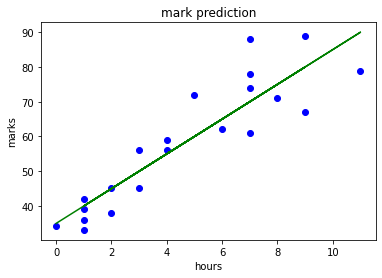

In [ ]:
plt.scatter(x_train,y_train,color ="blue")
plt.plot(x_train,std_reg.predict(x_train),color = "green")
plt.title("mark prediction")
plt.xlabel("hours")
plt.ylabel("marks")
plt.show()

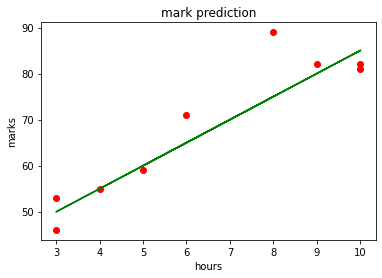

In [ ]:
plt.scatter(x_test,y_test,color ="red")
plt.plot(x_test,std_reg.predict(x_test),color = "green")
plt.title("mark prediction")
plt.xlabel("hours")
plt.ylabel("marks")
plt.show()

In [ ]:
# model evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
MAE = mean_absolute_error(y_test,y_predict)



In [ ]:
MAE

4.671353343865192

In [ ]:
MSE = mean_squared_error(y_test,y_predict)
MSE

26.94512240166313

In [ ]:
RMSE = np.sqrt(MSE)
print(RMSE)

5.190869137404943


In [ ]:
lrmse  = np.log(RMSE)
print(lrmse)

1.6469011470118082
